In [4]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
import time
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score,recall_score, roc_auc_score,precision_score 
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import rcParams
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np
from PIL import Image


In [5]:

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:

df = df[df["TotalCharges"] != " "]
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="ignore")

In [7]:

df["TotalCharges"] = df["TotalCharges"].replace([" "],0)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [8]:

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Telco Customer Churn

### **Bussiness problem**

Developing a machine learning model that allows us to predict whether a given client will leave us or stay.


### **Dataset Story**

Telco churn data includes informations about telecom company from California which provided home phone and internet services to above 7,000 customers.

The data set includes information about:
- Customers who left within last month - column CHURN
- Demographic information about customer (gender, age range, and if they have partners and dependents)
- Services that each customer has signed up for (phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies)
- Customer account information (how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges)

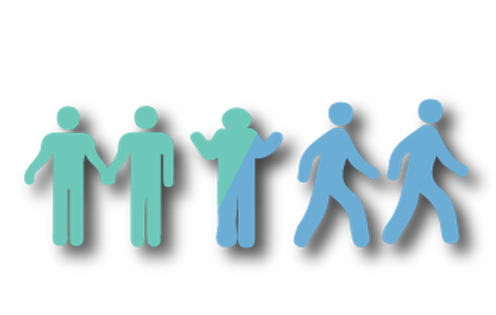

In [54]:

from IPython.display import Image
from PIL import Image
Image.open("customer_churn.png")


### **Data exploration**

Let us first start with exploring our data set, to better understand the patterns in the data.


In [12]:

pd.set_option('display.max_columns', None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


First we will look at the distribution of individual variables.


### **Visualizing the data with respect to churn:**

**CHURN - target variable:**
- CHURN column tells about customers who left within last month
- 26,6% od customers left us within last month

In [8]:


fig = px.histogram(df, x="Churn")
fig.update_layout(height=400, width=400)
fig.show()

**Distribution of categorical data:**


In [17]:

for column in df.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'PaperlessBilling', 'StreamingMovies', 'MonthlyCharges', 'TotalCharges', 'Churn'], axis=1):
    fig = px.histogram(df, x="Churn", color = column, barmode="group")
    fig.update_layout(width=500, height=400, bargap=0.1)
    fig.show() 

- Customers with month-to-month contract have larger churn rate
- Major customers who left us had Electronic Check as Payment Method


In [18]:

for column in df.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], axis=1):
    fig = px.histogram(df, x="Churn", color = column, barmode="group")
    fig.update_layout(width=500, height=400, bargap=0.1)
    fig.show() 

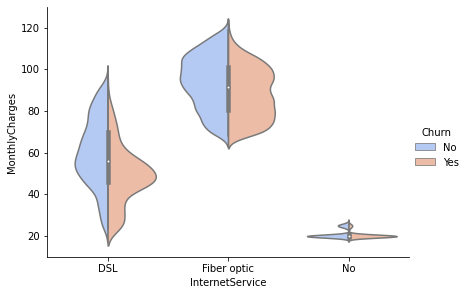

In [47]:

ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="coolwarm", data=df, height=4.2, aspect=1.4);

- Customers with fiber are more probable to churn than those with DSL connection
- Customers with DSL (slower connection) and higher charges are less probable to churn

**Visualizing the continuous data :**

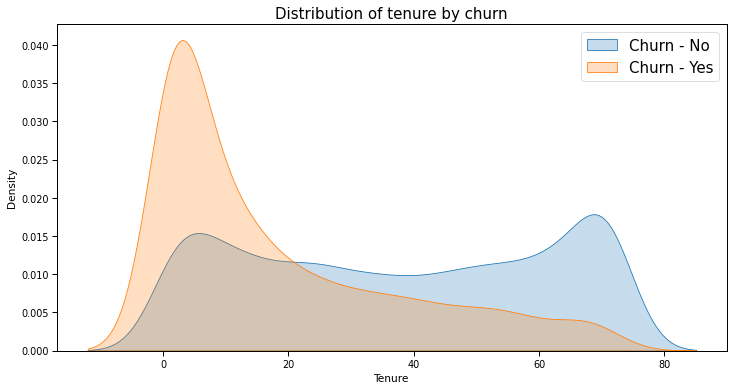

In [50]:

sns.set_context("paper",font_scale=1.1)
_, ax = plt.subplots(figsize=(12,6))
ax = sns.kdeplot(df.tenure[(df["Churn"] == "No") ], shade = True);
ax = sns.kdeplot(df.tenure[(df["Churn"] == "Yes") ], shade= True);
ax.legend(["Churn - No","Churn - Yes"],loc='upper right',fontsize=15);
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribution of tenure by churn',fontdict={'fontsize':15});

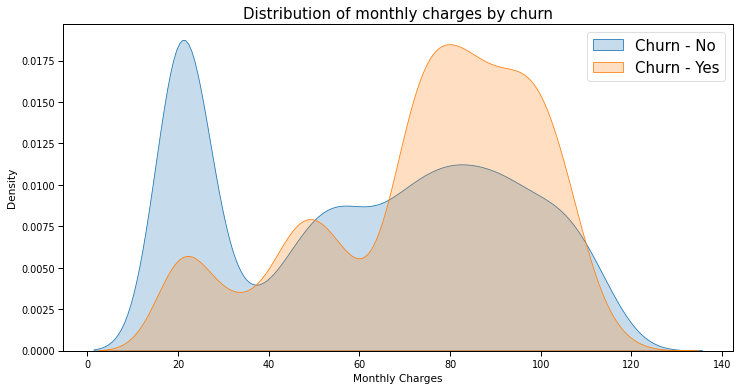

In [51]:

sns.set_context("paper",font_scale=1.1)
_, ax = plt.subplots(figsize=(12,6))
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == "No") ], shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == "Yes") ], shade= True);
ax.legend(["Churn - No","Churn - Yes"],loc='upper right',fontsize=15);
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn',fontdict={'fontsize':15});

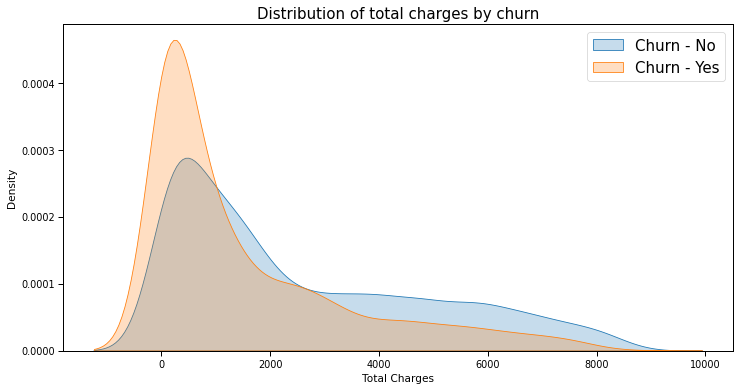

In [52]:

sns.set_context("paper",font_scale=1.1)
_, ax = plt.subplots(figsize=(12,6))
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == "No") ], shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == "Yes") ], shade= True);
ax.legend(["Churn - No","Churn - Yes"],loc='upper right',fontsize=15);
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn',fontdict={'fontsize':15});

- New customers are more likely to churn
- Customers with higher Monthly Charges are also more likely to churn
- Tenure and monthly charges are probably important features